# Problem Statment

* In industry, prognostics and health management are key topics for anticipating asset state and avoiding downtime and breakdowns. Run-to-Failure simulation data from turbofan jet engines is included. The C-MAPSS software was used to simulate engine degradation. Four separate sets of operational conditions and fault modes were simulated in four different ways. To characterize fault progression, record numerous sensor channels. The Prognostics CoE at NASA Ames provided the data set. The main goal is to predict the remaining useful life (RUL) of each engine. RUL is equivalent of number of flights remained for the engine after the last data point in the test dataset.

# Approach

* The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

# Data

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Reading the data

data = pd.read_csv('train_FD001.txt', sep=" ", header=None)
data.columns = ["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5"
                    ,"sensor6","sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13"
                    ,"sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
                    ,"sensor20","sensor21","sensor22","sensor23"]

data.drop(['sensor22', 'sensor23'], axis=1, inplace=True)

jet_id_and_rul = data.groupby(['id'])[["id" ,"cycle"]].max()
jet_id_and_rul.set_index('id', inplace=True)

In [3]:
data.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# Calculating RUL

In [5]:
def RUL_calculator(df, df_max_cycles):
    max_cycle = df_max_cycles["cycle"]
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='id', right_index=True)
    result_frame["RUL"] = result_frame["max_cycle"] - result_frame["cycle"] 
    result_frame.drop(['max_cycle'], axis=1, inplace=True)
    return result_frame

rul = RUL_calculator(data, jet_id_and_rul)

In [6]:
rul.describe()


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


# EDA

In [7]:
rul.isnull().sum()

id          0
cycle       0
op1         0
op2         0
op3         0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
RUL         0
dtype: int64

In [8]:
rul.isnull().sum()/len(data)


id          0.0
cycle       0.0
op1         0.0
op2         0.0
op3         0.0
sensor1     0.0
sensor2     0.0
sensor3     0.0
sensor4     0.0
sensor5     0.0
sensor6     0.0
sensor7     0.0
sensor8     0.0
sensor9     0.0
sensor10    0.0
sensor11    0.0
sensor12    0.0
sensor13    0.0
sensor14    0.0
sensor15    0.0
sensor16    0.0
sensor17    0.0
sensor18    0.0
sensor19    0.0
sensor20    0.0
sensor21    0.0
RUL         0.0
dtype: float64

* There are no null values

In [9]:
rul[rul.duplicated()]


,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL


* There are no duplicates

 # Visuvalization


 # Correlation Matrix

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import seaborn as sns

<AxesSubplot:>

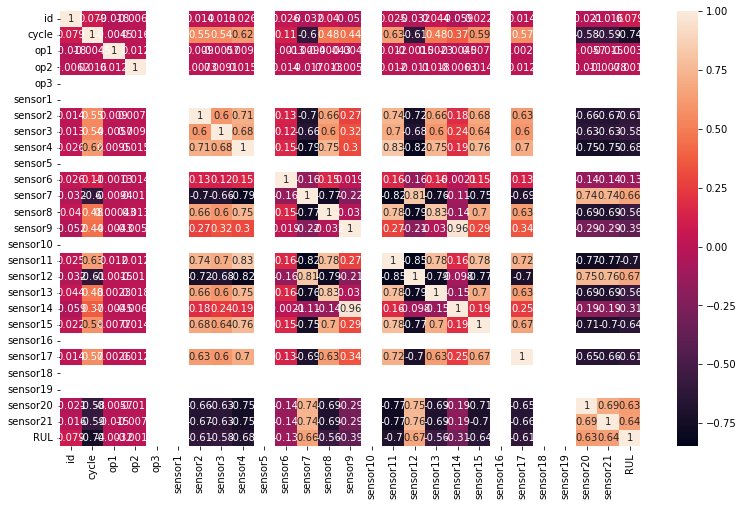

In [12]:
plt.figure(figsize=(13, 8))
sns.heatmap(rul.corr(),annot=True)

# Deletion of non contributing parameters into the analysis¶


* Using the above correlation heatmap, We can safely ignore the parameters with lesser correlation with RUL. we can infer that the following parameters are not related to the RUL.
id, op1, op2, op3 sensor1, sensor5, sensor6, sensor10 sensor16, sensor18, sensor19

In [13]:
relevant_data = rul.drop(["cycle", "op1", "op2", "op3", "sensor1", "sensor5", "sensor6", "sensor10", "sensor16", "sensor18", "sensor19", "sensor14", "sensor13", "sensor12", "sensor11"], axis=1)

<AxesSubplot:>

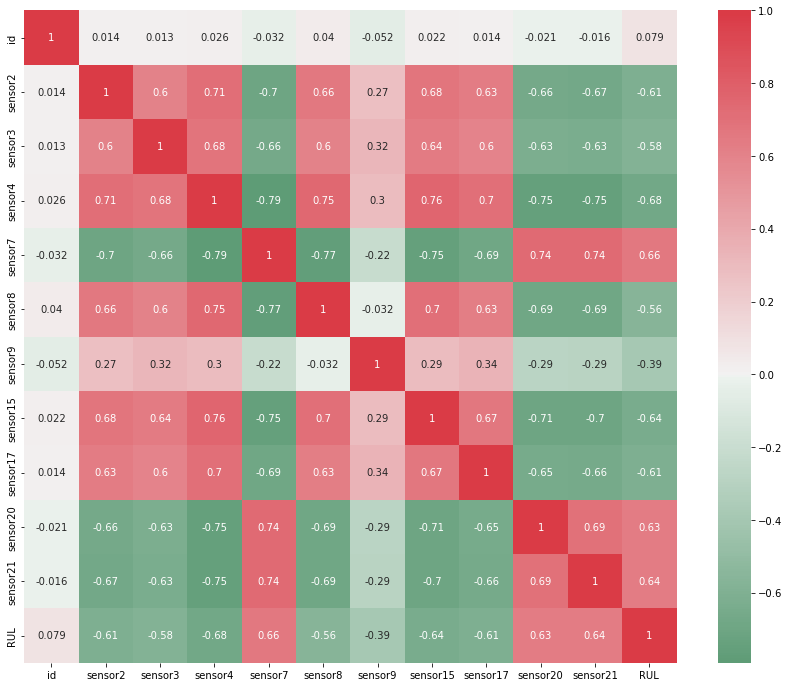

In [14]:
plt.figure(figsize=(15, 12))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(relevant_data.corr(), cmap =cmap, center=0, annot=True, square=True)

In [15]:
def plot_sensor(sensor_name,X):
    plt.figure(figsize=(13,5))
    for i in X['id'].unique():
        if (i % 10 == 0):  # only plot every engine
            plt.plot('RUL', sensor_name, 
                     data=X[X['id']==i].rolling(8).mean())
            plt.axvline(30, color='red', linestyle='dashed', linewidth=2)
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

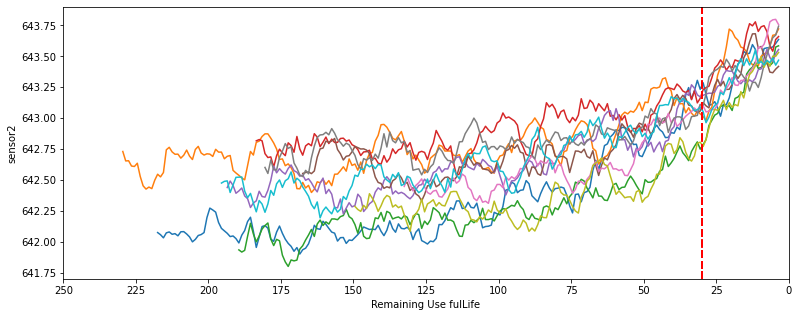

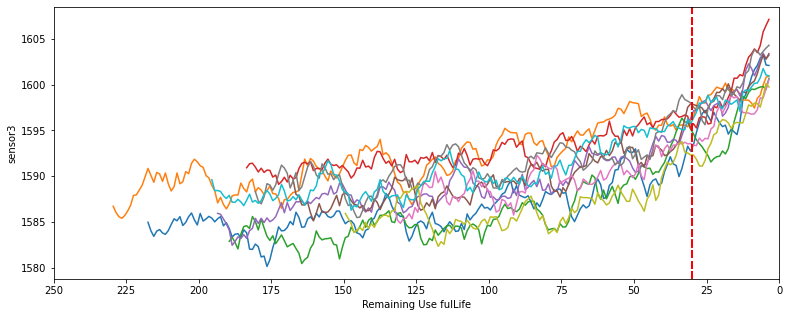

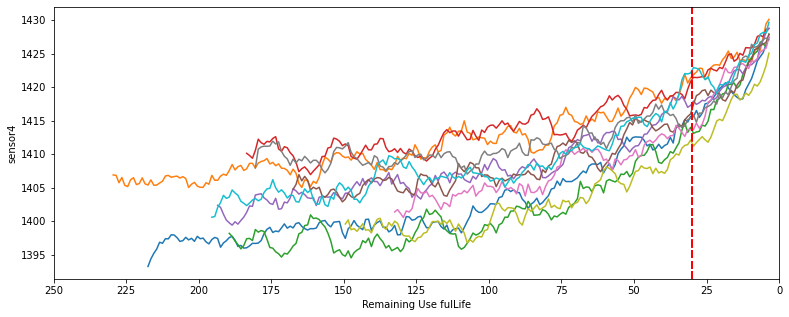

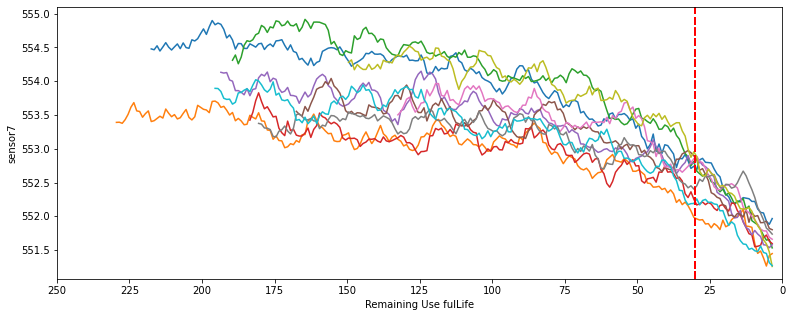

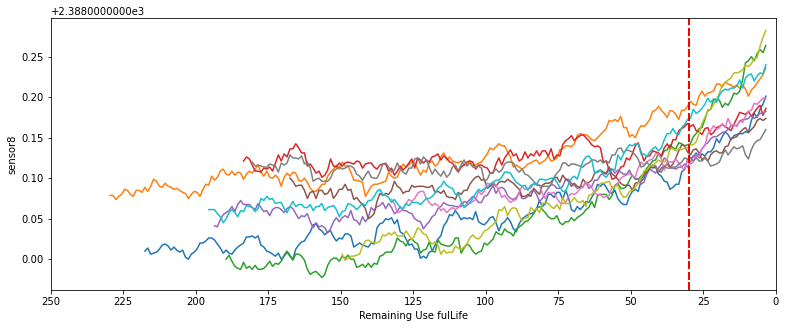

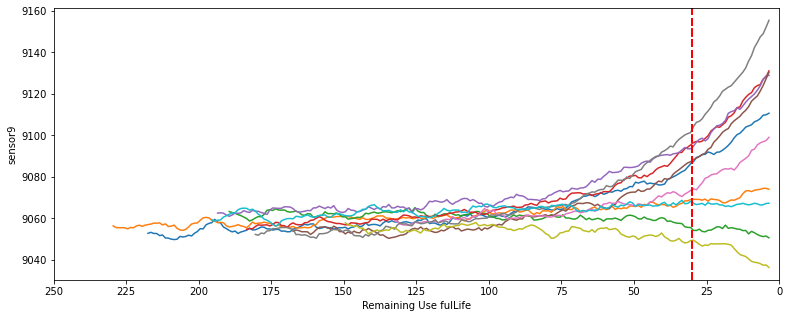

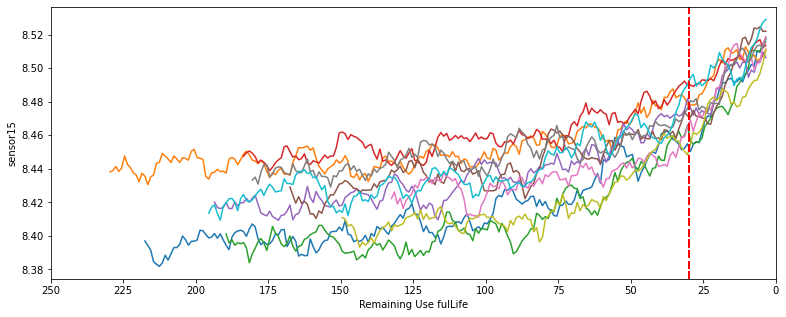

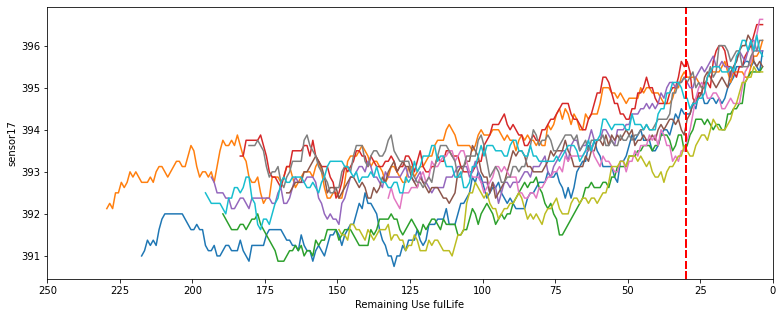

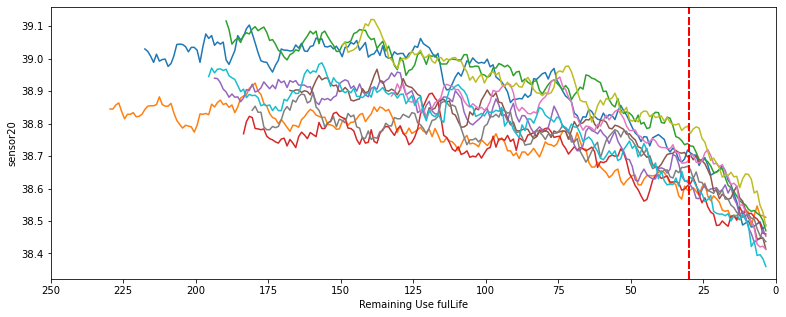

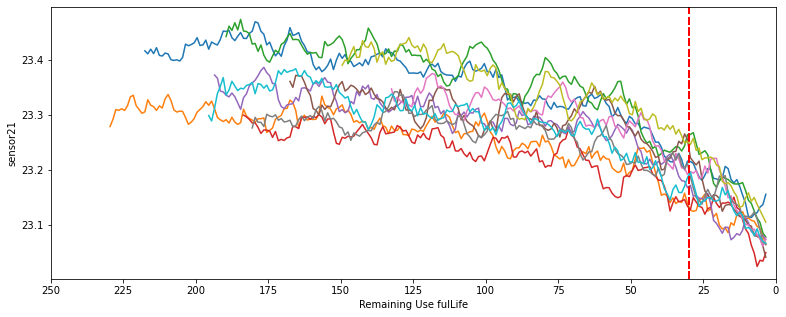

In [16]:
for sensor in relevant_data.drop(['id', 'RUL'], axis=1).columns:
    plot_sensor(sensor, relevant_data)

# Outliers

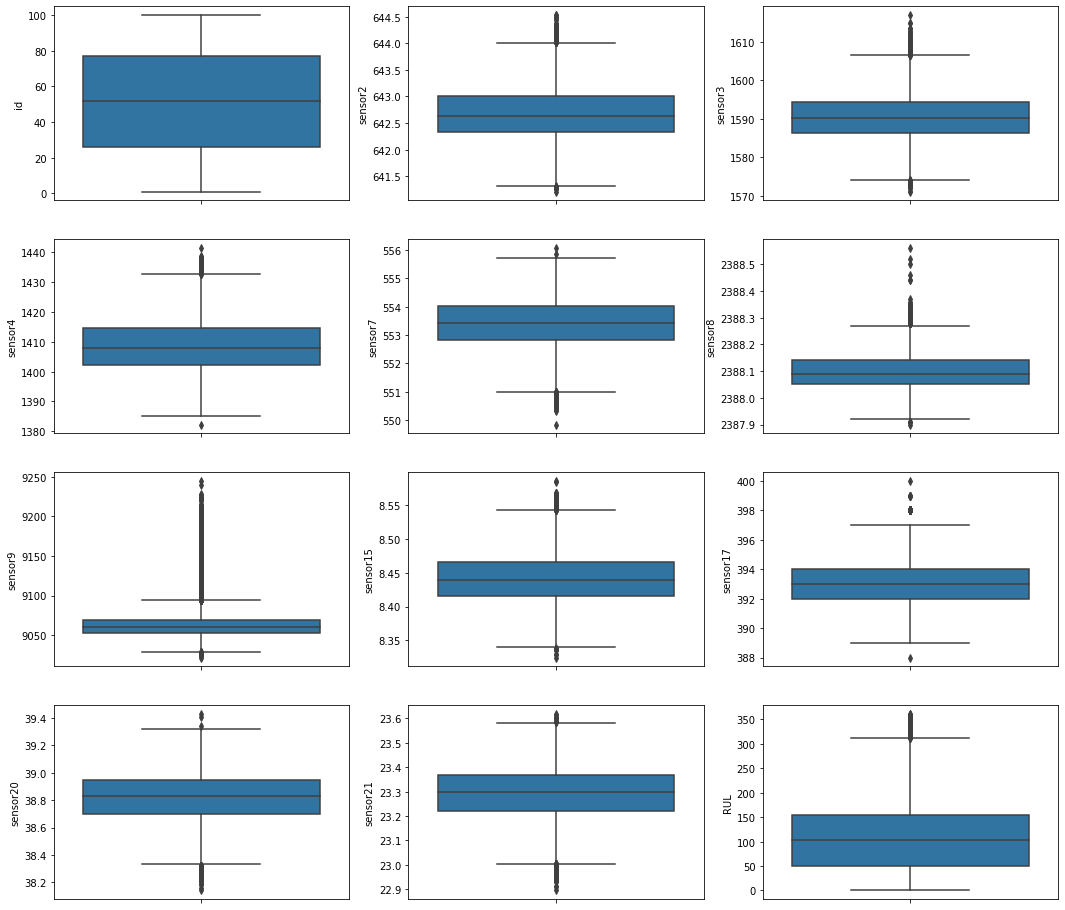

In [20]:
i=1
plt.figure(figsize=(18,25))
for feature in relevant_data.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=relevant_data[feature])
    i+=1

In [23]:
rul.to_csv('data.csv')

* Saving data into csv file